In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis of cancer types per cell line

In [3]:
# Model dataset : DepMap 24Q4 Model.csv
model_file_path = "cell_lines/Model.csv"
model = pd.read_csv(model_file_path)

# Expression data extracted from the R code
expression_file_path = "cell_lines/expression populations/expression_populations_SMARCA4_CDAN1.csv"
expression_populations = pd.read_csv(expression_file_path)

In [4]:
full_dataset = pd.merge(left=expression_populations, right=model, how="left", left_on="line", right_on="ModelID")

full_dataset = full_dataset[["line", "CellLineName", "population", "OncotreePrimaryDisease", "OncotreeLineage"]]

print(full_dataset)

           line CellLineName population  \
0    ACH-001098     KCI-MOH1        low   
1    ACH-000570         YKG1       high   
2    ACH-000769         LK-2       high   
3    ACH-000123       COV434        low   
4    ACH-001536      KKU-100        low   
..          ...          ...        ...   
190  ACH-000666    NCI-H1355        low   
191  ACH-000872       HCC515        low   
192  ACH-000781    NCI-H2023        low   
193  ACH-000402        BL-70       high   
194  ACH-000052        A-673       high   

                              OncotreePrimaryDisease       OncotreeLineage  
0                          Pancreatic Adenocarcinoma              Pancreas  
1                                     Diffuse Glioma             CNS/Brain  
2                         Non-Small Cell Lung Cancer                  Lung  
3                           Ovarian Epithelial Tumor  Ovary/Fallopian Tube  
4    Intraductal Papillary Neoplasm of the Bile Duct         Biliary Tract  
..                   

In [5]:
# Count occurrences
counts = full_dataset['OncotreePrimaryDisease'].value_counts()

# Compute percentages
model_percentages = counts / counts.sum() * 100

# Print nicely
print(model_percentages)

# Turn these percentages into a dictinary for later use
percent_dict = (
    full_dataset['OncotreePrimaryDisease']
    .value_counts(normalize=True)  # gives proportions
    .mul(100)                      # convert to %
    .round(2)                      # optional: round to 2 decimals
    .to_dict()
)

OncotreePrimaryDisease
Non-Small Cell Lung Cancer                         15.384615
Head and Neck Squamous Cell Carcinoma               7.179487
Lung Neuroendocrine Tumor                           6.666667
Mature B-Cell Neoplasms                             6.666667
Neuroblastoma                                       6.153846
Ovarian Epithelial Tumor                            4.615385
Ewing Sarcoma                                       3.589744
Intraductal Papillary Neoplasm of the Bile Duct     3.589744
Pancreatic Adenocarcinoma                           3.076923
Diffuse Glioma                                      3.076923
B-Lymphoblastic Leukemia/Lymphoma                   3.076923
Invasive Breast Carcinoma                           2.564103
Esophagogastric Adenocarcinoma                      2.564103
Melanoma                                            2.564103
T-Lymphoblastic Leukemia/Lymphoma                   2.051282
Hepatocellular Carcinoma                            2.051282
A

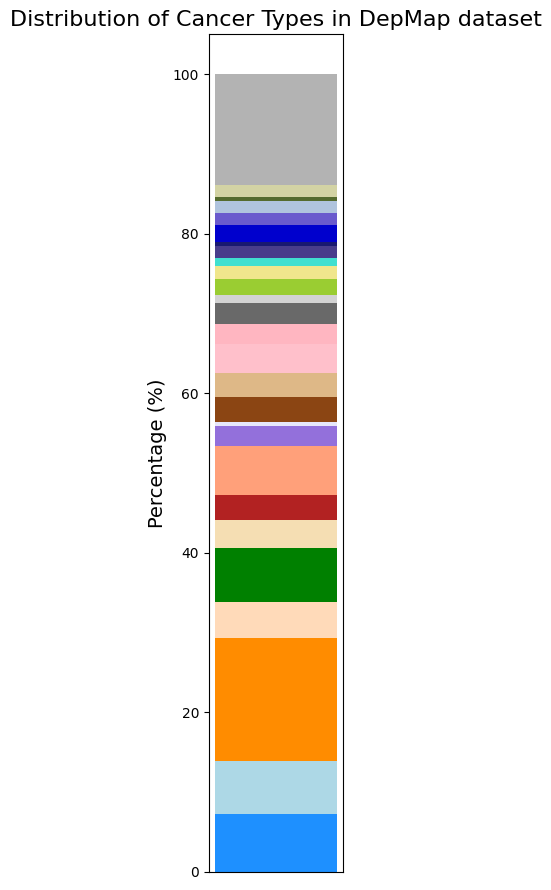

In [6]:
# List of cancer types in the REVERSED order from the image (bottom to top)
cancer_types = [
    "Head and Neck Squamous Cell Carcinoma",
    "Mature B-Cell Neoplasms",
    "Non-Small Cell Lung Cancer",
    "Ovarian Epithelial Tumor",
    "Lung Neuroendocrine Tumor",
    "Intraductal Papillary Neoplasm of the Bile Duct",
    "Diffuse Glioma",
    "Neuroblastoma",
    "Melanoma",
    "Renal Cell Carcinoma",
    "Pancreatic Adenocarcinoma",
    "B-Lymphoblastic Leukemia/Lymphoma",
    "Ewing Sarcoma",
    "Esophagogastric Adenocarcinoma",
    "Invasive Breast Carcinoma",
    "Colorectal Adenocarcinoma",
    "Acute Myeloid Leukemia",
    "Endometrial Carcinoma",
    "Cervical Squamous Cell Carcinoma",
    "Embryonal Tumor",
    "Rhabdoid Cancer",
    "Hepatocellular Carcinoma",
    "Bladder Urothelial Carcinoma",
    "Pleural Mesothelioma",
    "Liposarcoma",
    "Myeloproliferative Neoplasms",
    "Esophageal Squamous Cell Carcinoma",
    "Other", # "Other" will now be at the bottom
]

# Pairs of genes for which we extracted the expression populations
gene_pairs = [
    ["SMARCA4", "EP300"],
    ["SMARCA2", "SMARCA4"],
    ["SMARCB1", "EP300"],
    ["ARID1A", "EP300"],
    ["ARID1B", "EP300"],
    ["ARID2", "EP300"],
    ["PBRM1", "EGFR"],
    ["BAP1", "EP300"],
    ["CREBBP", "HLA-DQA1"],
    ["EED", "TAF1D"],
    ["KMT2C", "SDHD"],
    ["KMT2D", "EP300"],
    ["SETD2", "FECH"]
]

# Calculate the percentage for "Other" category
other_percent = 0
for cancer, percent in percent_dict.items():
    if cancer not in cancer_types[:-1]:  # Skip "Other" in the check
        other_percent += percent

# Create a new dictionary with our specific categories and "Other" in the reversed order
plot_data = {}
for cancer in cancer_types:
    if cancer == "Other":
        plot_data[cancer] = other_percent
    elif cancer in percent_dict:
        plot_data[cancer] = percent_dict[cancer]
    else:
        plot_data[cancer] = 0  # In case any cancer from our list isn't in percent_dict

# Define colors for each cancer type (same as the image)
colors = {
    "Other": "#B3B3B3",  # Light gray
    "Esophageal Squamous Cell Carcinoma": "#A4C639",  # Light green 
    "Myeloproliferative Neoplasms": "#D3D3A4",  # Light olive
    "Liposarcoma": "#556B2F",  # Dark olive green
    "Pleural Mesothelioma": "#B0C4DE",  # Light steel blue
    "Bladder Urothelial Carcinoma": "#6A5ACD",  # Slate blue
    "Hepatocellular Carcinoma": "#0000CD",  # Medium blue
    "Rhabdoid Cancer": "#191970",  # Midnight blue
    "Embryonal Tumor": "#483D8B",  # Dark slate blue
    "Cervical Squamous Cell Carcinoma": "#40E0D0",  # Turquoise
    "Endometrial Carcinoma": "#F0E68C",  # Khaki
    "Acute Myeloid Leukemia": "#9ACD32",  # Yellow green
    "Colorectal Adenocarcinoma": "#D3D3D3",  # Light gray
    "Invasive Breast Carcinoma": "#696969",  # Dim gray
    "Esophagogastric Adenocarcinoma": "#FFB6C1",  # Light pink
    "Ewing Sarcoma": "#FFC0CB",  # Pink
    "B-Lymphoblastic Leukemia/Lymphoma": "#DEB887",  # Burlywood
    "Pancreatic Adenocarcinoma": "#8B4513",  # Saddle brown
    "Renal Cell Carcinoma": "#E6E6FA",  # Lavender
    "Melanoma": "#9370DB",  # Medium purple
    "Neuroblastoma": "#FFA07A",  # Light salmon
    "Diffuse Glioma": "#B22222",  # Firebrick
    "Intraductal Papillary Neoplasm of the Bile Duct": "#F5DEB3",  # Wheat
    "Lung Neuroendocrine Tumor": "#008000",  # Green
    "Ovarian Epithelial Tumor": "#FFDAB9",  # Peach puff
    "Non-Small Cell Lung Cancer": "#FF8C00",  # Dark orange
    "Mature B-Cell Neoplasms": "#ADD8E6",  # Light blue
    "Head and Neck Squamous Cell Carcinoma": "#1E90FF",  # Dodger blue
}

# Save the data for the cancer bar
cancer_bar_data = {
    'categories': list(plot_data.keys()),
    'values': [plot_data[category] for category in plot_data.keys()],
    'colors': [colors[category] for category in plot_data.keys()]
}

# Function to create the individual stacked bar
def create_stacked_bar(position=0, width=0.8):
    values = cancer_bar_data['values']
    color_list = cancer_bar_data['colors']
    
    # Start with the first value
    plt.bar(position, values[0], width=width, color=color_list[0])
    bottom_value = values[0]
    
    # Add the rest of the values
    for i in range(1, len(values)):
        plt.bar(position, values[i], bottom=bottom_value, width=width, color=color_list[i])
        bottom_value += values[i]
    
    return bottom_value  # Total height of the bar

# Create a figure with a larger size to accommodate all labels
plt.figure(figsize=(3, 9))

# Prepare data in the reversed order
categories = list(plot_data.keys())
values = [plot_data[category] for category in categories]
color_list = [colors[category] for category in categories]

# Create a stacked bar chart with a single bar
plt.bar(0, values[0], color=color_list[0], label=categories[0])
bottom_value = values[0]

for i in range(1, len(values)):
    plt.bar(0, values[i], bottom=bottom_value, color=color_list[i], label=categories[i])
    bottom_value += values[i]

# Remove x-axis labels
plt.xticks([])
plt.xlabel('')

# Add a title and y-axis label
plt.title('Distribution of Cancer Types in DepMap dataset', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=14)

# # Add a legend with a smaller font size and place it to the right of the chart
# # This ensures the legend maintains the reversed order
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Adjust layout to make room for the legend
plt.tight_layout()
plt.subplots_adjust(right=0.7)

# Display the plot
plt.show()

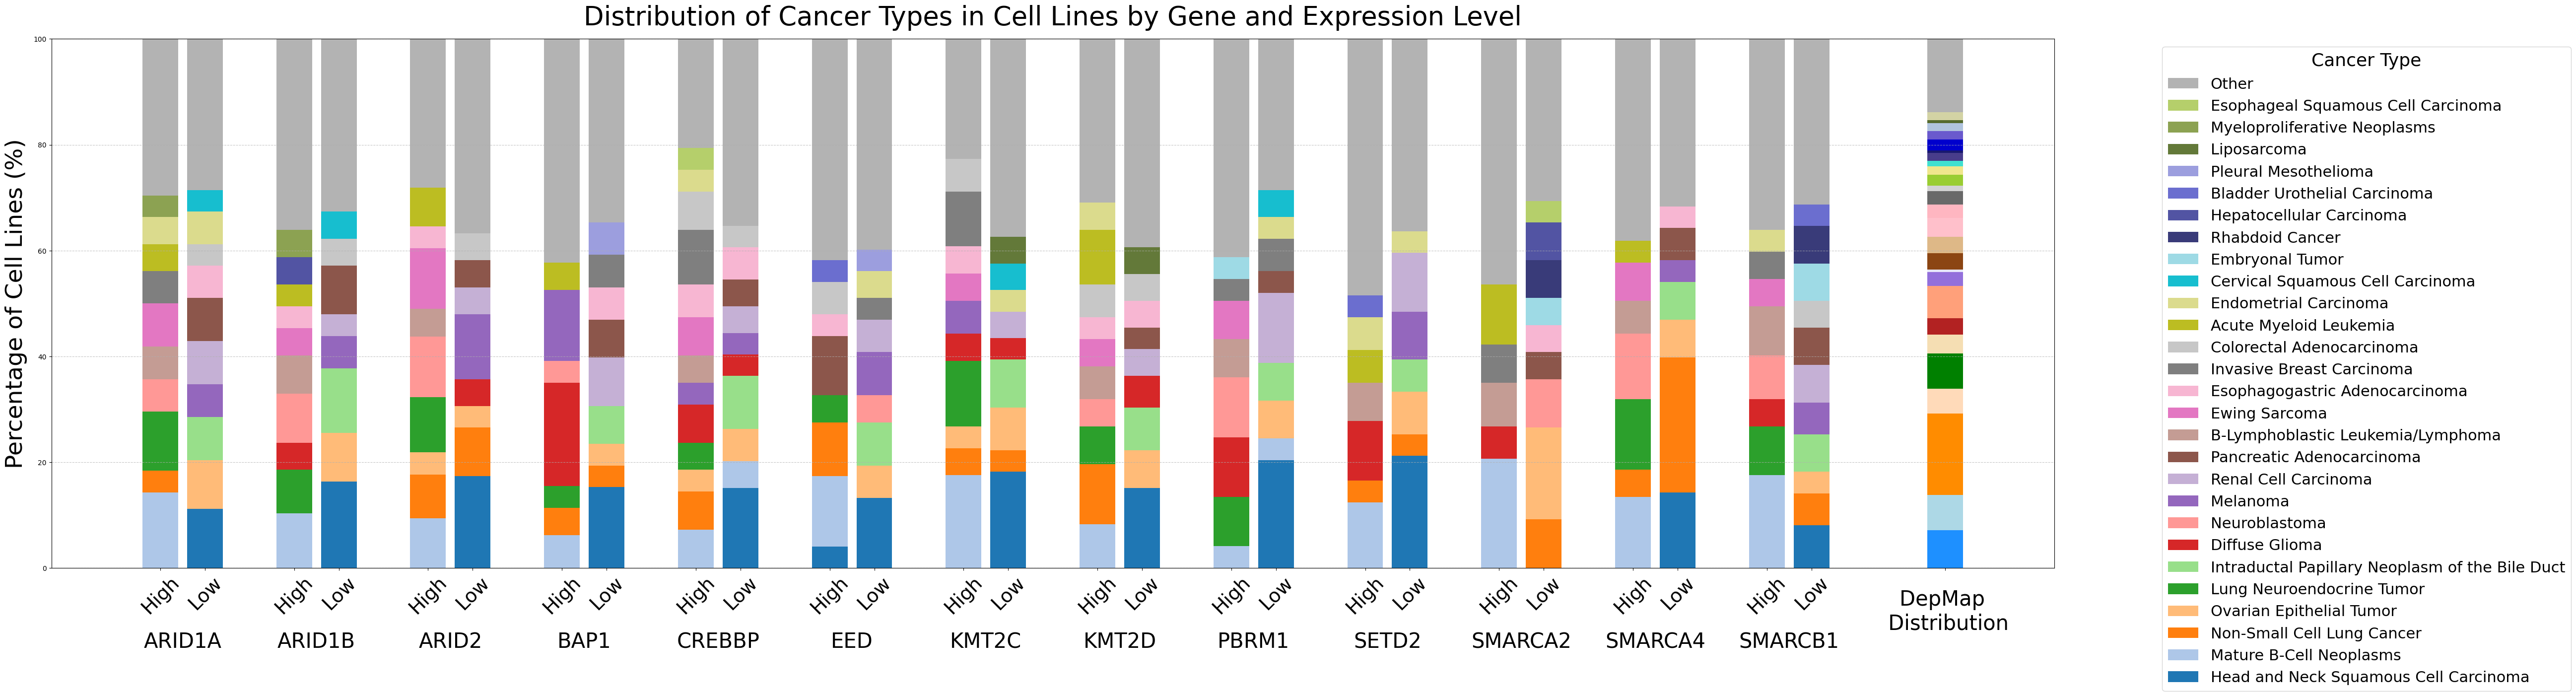

In [7]:
def process_all_data():
    # Initialize dictionaries to store disease counts for both population types
    high_disease_counts = {}
    low_disease_counts = {}
    
    missing_files = []
    threshold = 4  
    
    # Process each file and count occurrences of OncotreePrimaryDisease for both population types
    for pair in gene_pairs:
        filename = f"cell_lines/expression populations/expression_populations_{pair[0]}_{pair[1]}.csv"
        try:
            expression_populations = pd.read_csv(filename)
            
            # Merge with model data to get disease information
            full_dataset = pd.merge(
                left=expression_populations, 
                right=model, 
                how="left", 
                left_on="line", 
                right_on="ModelID"
            )
            
            # Get disease counts for high population
            high_pop = full_dataset[full_dataset["population"] == "high"]
            high_pop_count = high_pop["OncotreePrimaryDisease"].value_counts()
            
            # Rename diseases below threshold to "Other" in high population
            rare_in_high = high_pop_count[high_pop_count < threshold].index
            high_pop_count = high_pop_count.rename(lambda x: "Other" if x in rare_in_high else x)
            high_pop_count = high_pop_count.groupby(high_pop_count.index).sum()
            
            # Get disease counts for low population
            low_pop = full_dataset[full_dataset["population"] == "low"]
            low_pop_count = low_pop["OncotreePrimaryDisease"].value_counts()
            
            # Rename diseases below threshold to "Other" in low population
            rare_in_low = low_pop_count[low_pop_count < threshold].index
            low_pop_count = low_pop_count.rename(lambda x: "Other" if x in rare_in_low else x)
            low_pop_count = low_pop_count.groupby(low_pop_count.index).sum()
            
            # Store the final counts
            high_disease_counts[pair[0]] = high_pop_count
            low_disease_counts[pair[0]] = low_pop_count
            
        except FileNotFoundError:
            missing_files.append(f"{pair[0]}_{pair[1]}")
            continue
    
    if missing_files:
        print(f"Warning: Could not find {len(missing_files)} files: {', '.join(missing_files)}")
    
    if not high_disease_counts or not low_disease_counts:
        raise ValueError("No data found for any gene pairs. Check file paths and names.")
    
    # Convert to DataFrames
    high_df = pd.DataFrame(high_disease_counts).fillna(0)
    high_df.index.name = 'Disease'
    
    low_df = pd.DataFrame(low_disease_counts).fillna(0)
    low_df.index.name = 'Disease'
    
    # Melt for combined plotting
    high_melted = high_df.reset_index().melt(
        id_vars="Disease", 
        var_name="Gene", 
        value_name="Count"
    )
    high_melted["Population"] = "High"
    
    low_melted = low_df.reset_index().melt(
        id_vars="Disease", 
        var_name="Gene", 
        value_name="Count"
    )
    low_melted["Population"] = "Low"
    
    combined_df = pd.concat([high_melted, low_melted], ignore_index=True)
    
    # Determine disease order (treating "Other" as last)
    disease_totals = combined_df.groupby("Disease")["Count"].sum()
    if "Other" in disease_totals:
        disease_order = disease_totals.drop("Other").sort_values(ascending=False).index.tolist()
        disease_order.append("Other")
    else:
        disease_order = disease_totals.sort_values(ascending=False).index.tolist()
    
    return combined_df, disease_order

def create_modified_combined_plot():
    combined_df, disease_order = process_all_data()
    
    # Set figure size
    plt.figure(figsize=(52, 14))
    
    # Get the unique genes and create positions for the bars
    gene_names = sorted(combined_df["Gene"].unique())
    
    # We need two bars per gene with a small gap between them, and a larger gap between genes
    bar_width = 0.8
    group_gap = 1  # Gap between high/low pairs
    
    # Create positions for each bar
    positions = []
    high_low_labels = []
    gene_labels = []
    
    for i, gene in enumerate(gene_names):
        # Position for this gene's high expression bar
        pos_high = i * (2 + group_gap)
        positions.append(pos_high)
        high_low_labels.append("High")
        
        # Position for this gene's low expression bar
        pos_low = pos_high + 1
        positions.append(pos_low)
        high_low_labels.append("Low")
        
        # Add gene label centered between high and low bars
        gene_labels.append((pos_high + pos_low) / 2)
    
    # Add positions for the cancer distribution bar (at the end)
    last_position = positions[-1] + 2 + group_gap  # Extra gap after the last gene
    positions.append(last_position)
    high_low_labels.append("")  # Add one more label to match positions
    
    # Create a dict to map disease names to colors
    tab20 = plt.colormaps['tab20']
    tab20b = plt.colormaps['tab20b']
    tab20c = plt.colormaps['tab20c']
    
    # Combine colors from multiple palettes
    plot_colors = []
    num_diseases = len(disease_order)
    
    for i in range(min(20, num_diseases)):
        plot_colors.append(tab20(i/20))
    if num_diseases > 20:
        for i in range(min(20, num_diseases-20)):
            plot_colors.append(tab20b(i/20))
    if num_diseases > 40:
        for i in range(min(20, num_diseases-40)):
            plot_colors.append(tab20c(i/20))
    
    # Create color dictionary
    color_dict = dict(zip(disease_order, plot_colors))
    if "Other" in disease_order:
        color_dict["Other"] = (0.7, 0.7, 0.7, 1.0)  # Gray color for "Other"
    
    # Calculate total count for each position (high/low for each gene)
    total_counts = {}
    for i, gene in enumerate(gene_names):
        # Calculate total for high expression
        high_total = combined_df[(combined_df["Gene"] == gene) & 
                               (combined_df["Population"] == "High")]["Count"].sum()
        total_counts[(gene, "High")] = high_total
        
        # Calculate total for low expression
        low_total = combined_df[(combined_df["Gene"] == gene) & 
                              (combined_df["Population"] == "Low")]["Count"].sum()
        total_counts[(gene, "Low")] = low_total
    
    # Plot the stacked bars as percentages
    bottoms = np.zeros(len(positions) - 1)  # Excluding the last position for now
    
    # Plot each disease as a segment of the stacked bar
    for disease in disease_order:
        percentage_heights = []
        
        for i, gene in enumerate(gene_names):
            # Get percentage for high expression
            high_count = combined_df[(combined_df["Gene"] == gene) & 
                                   (combined_df["Population"] == "High") & 
                                   (combined_df["Disease"] == disease)]["Count"].values
            high_value = high_count[0] if len(high_count) > 0 else 0
            high_percentage = (high_value / total_counts[(gene, "High")]) * 100 if total_counts[(gene, "High")] > 0 else 0
            percentage_heights.append(high_percentage)
            
            # Get percentage for low expression
            low_count = combined_df[(combined_df["Gene"] == gene) & 
                                  (combined_df["Population"] == "Low") & 
                                  (combined_df["Disease"] == disease)]["Count"].values
            low_value = low_count[0] if len(low_count) > 0 else 0
            low_percentage = (low_value / total_counts[(gene, "Low")]) * 100 if total_counts[(gene, "Low")] > 0 else 0
            percentage_heights.append(low_percentage)
        
        plt.bar(positions[:-1], percentage_heights, bottom=bottoms, width=bar_width, 
                label=disease, color=color_dict[disease])
        bottoms += percentage_heights
    
    # Now add the cancer distribution bar at the end (assuming create_stacked_bar is defined elsewhere)
    create_stacked_bar(position=last_position, width=bar_width)
    
    # Customize the plot
    plt.xticks(positions, high_low_labels, fontsize=28, rotation=45, ha='center')
    plt.ylabel("Percentage of Cell Lines (%)", fontsize=34, labelpad=9)  # Updated label
    plt.title("Distribution of Cancer Types in Cell Lines by Gene and Expression Level", fontsize=38, pad=20)
    plt.ylim(0, 100)  # Set y-axis to 0-100% for percentages
    
    # Add gene labels below the high/low labels with extra spacing
    for i, gene in enumerate(gene_names):
        plt.text(gene_labels[i], -12, gene, ha='center', va='top', fontsize=30, rotation=0, transform=plt.gca().transData)
    
    # Add a label for the cancer distribution bar
    plt.text(last_position, -4, "DepMap \n Distribution", ha='center', va='top', fontsize=30, rotation=0, transform=plt.gca().transData)
    
    # Add grid lines for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Create legend with reversed order
    handles, labels = plt.gca().get_legend_handles_labels()
    
    # Add the legend for the original disease colors first
    plt.legend(
        handles[::-1], labels[::-1],  # Reverse the order
        title="Cancer Type",
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=22,
        title_fontsize=26,
        ncol=1
    )
    
    # Improve spacing
    plt.tight_layout()
    
    # Save the figure
    plt.savefig("combined_population_disease_distribution_percentage.png", dpi=300, bbox_inches="tight")
    
    return plt.gcf()

# Generate the combined plot
combined_figure = create_modified_combined_plot()
plt.show()

In [8]:
# Calculate and print summary statistics
def print_summary_statistics():
    combined_df, _ = process_all_data()

    # Total number of cell lines
    total_cell_lines = combined_df['Count'].sum()
    print(f"Total number of cell lines: {total_cell_lines}")

    # Group by population and calculate percentages
    population_counts = combined_df.groupby('Population')['Count'].sum()
    for population, count in population_counts.items():
        percentage = (count / total_cell_lines) * 100
        print(f"{population} expression group: {count} cell lines ({percentage:.2f}%)")

    # Per-gene statistics
    gene_stats = combined_df.groupby(['Gene', 'Population'])['Count'].sum().unstack(fill_value=0)
    print("\nPer-gene statistics:")
    print(gene_stats)

    # Total cell lines per gene
    gene_totals = gene_stats.sum(axis=1)
    print("\nTotal cell lines per gene:")
    print(gene_totals)

    # Percentage of high and low expression per gene
    print("\nPercentage of high and low expression per gene:")
    for gene, row in gene_stats.iterrows():
        high_percentage = (row['High'] / row.sum()) * 100 if row.sum() > 0 else 0
        low_percentage = (row['Low'] / row.sum()) * 100 if row.sum() > 0 else 0
        print(f"{gene}: High = {high_percentage:.2f}%, Low = {low_percentage:.2f}%")

    # Percentages of cancer types for each high/low expression group of each gene
    print("\nPercentages of cancer types for each high/low expression group of each gene:")
    cancer_type_stats = combined_df.groupby(['Gene', 'Population', 'Disease'])['Count'].sum()
    for (gene, population), group in cancer_type_stats.groupby(level=[0, 1]):
        total = group.sum()
        print(f"\n{gene} ({population} expression):")
        for disease, count in group.items():
            percentage = (count / total) * 100 if total > 0 else 0
            print(f"  {disease}: {count} cell lines ({percentage:.2f}%)")

# Print the summary statistics
print_summary_statistics()

Total number of cell lines: 2541.0
High expression group: 1262.0 cell lines (49.67%)
Low expression group: 1279.0 cell lines (50.33%)

Per-gene statistics:
Population  High   Low
Gene                  
ARID1A      98.0  98.0
ARID1B      97.0  98.0
ARID2       96.0  98.0
BAP1        97.0  98.0
CREBBP      97.0  99.0
EED         98.0  98.0
KMT2C       97.0  99.0
KMT2D       97.0  99.0
PBRM1       97.0  98.0
SETD2       97.0  99.0
SMARCA2     97.0  98.0
SMARCA4     97.0  98.0
SMARCB1     97.0  99.0

Total cell lines per gene:
Gene
ARID1A     196.0
ARID1B     195.0
ARID2      194.0
BAP1       195.0
CREBBP     196.0
EED        196.0
KMT2C      196.0
KMT2D      196.0
PBRM1      195.0
SETD2      196.0
SMARCA2    195.0
SMARCA4    195.0
SMARCB1    196.0
dtype: float64

Percentage of high and low expression per gene:
ARID1A: High = 50.00%, Low = 50.00%
ARID1B: High = 49.74%, Low = 50.26%
ARID2: High = 49.48%, Low = 50.52%
BAP1: High = 49.74%, Low = 50.26%
CREBBP: High = 49.49%, Low = 50.51%
EED:

In [13]:
# Calculate and print summary statistics
def print_summary_statistics():
    combined_df, _ = process_all_data()

    # Total number of cell lines
    total_cell_lines = combined_df['Count'].sum()
    print(f"Total number of cell lines: {total_cell_lines}")

    # Group by population and calculate percentages
    population_counts = combined_df.groupby('Population')['Count'].sum()
    for population, count in population_counts.items():
        percentage = (count / total_cell_lines) * 100
        print(f"{population} expression group: {count} cell lines ({percentage:.2f}%)")

    # Per-gene statistics
    gene_stats = combined_df.groupby(['Gene', 'Population'])['Count'].sum().unstack(fill_value=0)
    print("\nPer-gene statistics:")
    print(gene_stats)

    # Total cell lines per gene
    gene_totals = gene_stats.sum(axis=1)
    print("\nTotal cell lines per gene:")
    print(gene_totals)

    # Percentage of high and low expression per gene
    print("\nPercentage of high and low expression per gene:")
    for gene, row in gene_stats.iterrows():
        high_percentage = (row['High'] / row.sum()) * 100 if row.sum() > 0 else 0
        low_percentage = (row['Low'] / row.sum()) * 100 if row.sum() > 0 else 0
        print(f"{gene}: High = {high_percentage:.2f}%, Low = {low_percentage:.2f}%")

    # Percentages of cancer types for each high/low expression group of each gene
    print("\nPercentages of cancer types for each high/low expression group of each gene:")
    cancer_type_stats = combined_df.groupby(['Gene', 'Population', 'Disease'])['Count'].sum()
    for (gene, population), group in cancer_type_stats.groupby(level=[0, 1]):
        total = group.sum()
        print(f"\n{gene} ({population} expression):")
        for disease, count in group.items():
            percentage = (count / total) * 100 if total > 0 else 0
            print(f"  {disease}: {count} cell lines ({percentage:.2f}%)")

# Print the summary statistics
print_summary_statistics()

/tmp/ipykernel_8753/800508190.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_pop["CancerType"] = high_pop["OncotreePrimaryDisease"].apply(
/tmp/ipykernel_8753/800508190.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_pop["CancerType"] = low_pop["OncotreePrimaryDisease"].apply(
/tmp/ipykernel_8753/800508190.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

ValueError: too many values to unpack (expected 2)